# Analysis



Now we'll take the CONLL data and do some analysis. Like 
* plot the frequencies of some lemma
* look at some lemmas contexts
* analyze some lemmas collocations


## 0. Imports and data upload

In [1]:
import pandas as pd

In [2]:
import re

In [3]:
import os

In [4]:
conllfiles = (r"../data/conll")

In [84]:
corpus_annotations = {}
for filename in os.listdir(conllfiles):
    if '.conll' in filename:
        path = os.path.join(conllfiles, filename)  
        data = pd.read_csv(path) 
        corpus_annotations[filename] = data

## 1. Search lemma and plot frequency

In [88]:
class WordSearchEngine:
    
    def __init__(self, corpus_annotated):
        self.prepare_index_dataframe_for_search(corpus_annotated)
    
    def prepare_index_dataframe_for_search(self, corpus_annotated):
        for filename, annotated_text in corpus_annotated.items():
            year, month, day = self.get_date_fname(filename)
            annotated_text['month'] = month
        self.full_df = pd.concat(corpus_annotated.values())
        print(f'Searching in a corpus of {self.full_df.shape[0]} word occurences')
        
    def get_date_fname(self, filename):  ## REDO WITH METADATA
        date_pattern = re.search(r'(19\d\d)(\d\d)(\d\d)-0-0-0-0', filename)
        year = date_pattern.group(1)
        month = f'{year}-{date_pattern.group(2)}'
        day =  f'{month}-{date_pattern.group(3)}'
        return year, month, day    
        
    def search_and_plot(self):
        search_term = input('Insert a word to search: ')
        if len(search_term) == 0:
            search_term = 'Grippe'
        result = self.full_df.query(f'Lemma=="{search_term}"')
        result.groupby('month').count().Lemma.plot(title=f'frequency of {search_term}');
        

In [89]:
engine = WordSearchEngine(corpus_annotations)

Searching in a corpus of 3008370 word occurences


Insert a word to search: 


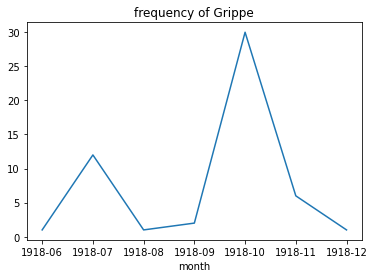

In [90]:
engine.search_and_plot()

## 2. Exploring the contexts

Let us look at the contexts in which the words appear


### 2.1 KWIC

In [148]:
class ContextViewer:
    
    def __init__(self, corpus_annotated):
        self.full_df = self.prepare_index_dataframe_for_search(corpus_annotated)
        self.full_df = self.full_df.reset_index()
        #print(type(self.full_df))
        
    def prepare_index_dataframe_for_search(self, corpus_annotated):
        for filename, annotated_text in corpus_annotated.items():
            year, month, day = self.get_date_fname(filename)
            annotated_text['month'] = month
        return pd.concat(corpus_annotated.values())
        #print(f'Searching in a corpus of {self.full_df.shape[0]} word occurences')
        
    def get_date_fname(self, filename): ## REDO WITH METADATA
        date_pattern = re.search(r'(19\d\d)(\d\d)(\d\d)-0-0-0-0', filename)
        year = date_pattern.group(1)
        month = f'{year}-{date_pattern.group(2)}'
        day =  f'{month}-{date_pattern.group(3)}'
        return year, month, day    
        
    def get_context(self):
        search_lemma = input('Insert a word to search: ')
        if len(search_lemma) == 0:
            search_lemma = 'Grippe'
        indices = self.full_df.query(f'Lemma=="{search_lemma}"').index
        #print(indices)
        left_contexts = []
        this_words = []
        right_contexts = []
        months = []
        for indice in indices:
            left = self.full_df.iloc[indice-10:indice-1, ]["Token"]
            leftс = left[~left.str.contains('\n')]
            right = self.full_df.iloc[indice+1:indice+10, ]["Token"]
            rightс = right[~right.str.contains('\n')]
            left_contexts.append(' '.join(leftс))
            right_contexts.append(' '.join(rightс))
            this_words.append(self.full_df.iloc[indice, ]["Token"])
            months.append(self.full_df.iloc[indice, ]["month"])
        newdf = pd.DataFrame()
        newdf['left_context'] = left_contexts
        newdf['word'] = this_words
        newdf['right_context'] = right_contexts
        newdf['month'] = months
        return newdf #.sort_values(by='month')

In [149]:
kwic = ContextViewer(corpus_annotations)

In [150]:
kwic.get_context()

Insert a word to search: krank


,left_context,word,right_context,month
0,"foumt die Meldung , Marſchall Io ffr e",krank,an Grippe darniederliegt . Sein Beſuch in England,1918-10
1,", jeßt anſcheinend ruhiger , „ er ſehnt",krank,nach Dir = E Zt ſo blaß und mager,1918-09
2,und dur < die wahlloſe Bermiſchung geſupder “,kranker,Bevölkerungen von neuem alle zentralafrikaniſc...,1918-09
3,"doch vor » kommen , daß ein Prinz",krank,iſt oder aus . anderen Grün « »,1918-01
4,". Und wenn ſte ihm empfehlen , „",kranken,Nerven zu ſchonen und fich aus dem öffentlihen,1918-12
5,"Schiff auch die Frauen , Kinder und ſchwer- """,kranken,Männer aus Deutſch-Oſtafrika heimbefördert wer...,1918-12
6,Ernährung der Säuolinge und Kleinkind . in geſ...,kranken,"Tagen , die verantwortungsolle Tätigkeit der K...",1918-06
7,der Preſſe . 5 4 „ Nachdem Jeſſen,kranken,"Hermann Fveudenberg gebacht hatte , wandte er ...",1918-08
8,"ihn nach Hauſe führen zu laſſen , da er",krank,ſei . Aber Freddy lehnte haſtig ab und,1918-11
9,". Neid EN « 635 , 4",krank,"langſam fein Glas aus , räuſperte ſich Teicht",1918-07


### 2.2 Collocations